### **HR Analytics**

### **Problem Statement:**

A large company named XYZ, employs, at any given point of time, around 4000 employees. However, every year, around 15% of its employees leave the company and need to be replaced with the talent pool available in the job market. The management believes that this level of attrition is bad for the company, because of the following reasons -
1. The former employees’ projects get delayed, which makes it difficult to meet timelines, resulting in a reputation loss among consumers and partners.
2. A sizeable department has to be maintained, for the purposes of recruiting new talent.
3. More often than not, the new employees have to be trained for the job and/or given time to acclimatise themselves to the company.
 
Hence, the management has contracted an analytics firm to understand what factors they should focus on, in order to curb attrition. Also, they want to know which of these variables is most important and needs to be addressed right away.

### **Objective:**

You are required to model the probability of attrition using a logistic regression. The results thus obtained will be used by the management to understand what changes they should make to their workplace, in order to get most of their employees to stay.

### **Data analysis process:**

Analysis will be done as follows.

1. Understanding data
2. Data cleaning (Removing duplicates, treating outiliers and missing values etc.)
3. Exporatory data analysis
4. Model building
5. Model evaluation

In [2]:
# Load the following packages.

import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import r2_score, accuracy_score, confusion_matrix
import kds

### **Understanding the data**

In [3]:
# Loading the given datasets.

employee_survey_data = pd.read_csv("employee_survey_data.csv")

general_data = pd.read_csv("general_data.csv")

in_time = pd.read_csv("in_time.csv")

out_time = pd.read_csv("out_time.csv")

manager_survey_data = pd.read_csv("manager_survey_data.csv")

In [4]:
# View the structure of dataframe employee_survey_data.

employee_survey_data

,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,1,3.0,4.0,2.0
1,2,3.0,2.0,4.0
2,3,2.0,2.0,1.0
3,4,4.0,4.0,3.0
4,5,4.0,1.0,3.0
...,...,...,...,...
4405,4406,4.0,1.0,3.0
4406,4407,4.0,4.0,3.0
4407,4408,1.0,3.0,3.0
4408,4409,4.0,1.0,3.0


In [5]:
# View the structure of dataframe general_data.

general_data

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,42,No,Travel_Rarely,Research & Development,5,4,Medical,1,4406,Female,...,3.0,Y,17,8,1,10.0,5,3,0,2
4406,29,No,Travel_Rarely,Research & Development,2,4,Medical,1,4407,Male,...,2.0,Y,15,8,0,10.0,2,3,0,2
4407,25,No,Travel_Rarely,Research & Development,25,2,Life Sciences,1,4408,Male,...,0.0,Y,20,8,0,5.0,4,4,1,2
4408,42,No,Travel_Rarely,Sales,18,2,Medical,1,4409,Male,...,0.0,Y,14,8,1,10.0,2,9,7,8


In [6]:
# View the structure of dataframe in_time.

in_time

,Unnamed: 0,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,...,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,1,NaN,2015-01-02 09:43:45,2015-01-05 10:08:48,2015-01-06 09:54:26,2015-01-07 09:34:31,2015-01-08 09:51:09,2015-01-09 10:09:25,2015-01-12 09:42:53,2015-01-13 10:13:06,...,NaN,2015-12-21 09:55:29,2015-12-22 10:04:06,2015-12-23 10:14:27,2015-12-24 10:11:35,NaN,2015-12-28 10:13:41,2015-12-29 10:03:36,2015-12-30 09:54:12,2015-12-31 10:12:44
1,2,NaN,2015-01-02 10:15:44,2015-01-05 10:21:05,NaN,2015-01-07 09:45:17,2015-01-08 10:09:04,2015-01-09 09:43:26,2015-01-12 10:00:07,2015-01-13 10:43:29,...,2015-12-18 10:37:17,2015-12-21 09:49:02,2015-12-22 10:33:51,2015-12-23 10:12:10,NaN,NaN,2015-12-28 09:31:45,2015-12-29 09:55:49,2015-12-30 10:32:25,2015-12-31 09:27:20
2,3,NaN,2015-01-02 10:17:41,2015-01-05 09:50:50,2015-01-06 10:14:13,2015-01-07 09:47:27,2015-01-08 10:03:40,2015-01-09 10:05:49,2015-01-12 10:03:47,2015-01-13 10:21:26,...,2015-12-18 10:15:14,2015-12-21 10:10:28,2015-12-22 09:44:44,2015-12-23 10:15:54,2015-12-24 10:07:26,NaN,2015-12-28 09:42:05,2015-12-29 09:43:36,2015-12-30 09:34:05,2015-12-31 10:28:39
3,4,NaN,2015-01-02 10:05:06,2015-01-05 09:56:32,2015-01-06 10:11:07,2015-01-07 09:37:30,2015-01-08 10:02:08,2015-01-09 10:08:12,2015-01-12 10:13:42,2015-01-13 09:53:22,...,2015-12-18 10:17:38,2015-12-21 09:58:21,2015-12-22 10:04:25,2015-12-23 10:11:46,2015-12-24 09:43:15,NaN,2015-12-28 09:52:44,2015-12-29 09:33:16,2015-12-30 10:18:12,2015-12-31 10:01:15
4,5,NaN,2015-01-02 10:28:17,2015-01-05 09:49:58,2015-01-06 09:45:28,2015-01-07 09:49:37,2015-01-08 10:19:44,2015-01-09 10:00:50,2015-01-12 10:29:27,2015-01-13 09:59:32,...,2015-12-18 09:58:35,2015-12-21 10:03:41,2015-12-22 10:10:30,2015-12-23 10:13:36,2015-12-24 09:44:24,NaN,2015-12-28 10:05:15,2015-12-29 10:30:53,2015-12-30 09:18:21,2015-12-31 09:41:09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,4406,NaN,2015-01-02 09:20:32,2015-01-05 10:17:53,2015-01-06 10:26:51,2015-01-07 10:06:58,2015-01-08 09:45:06,2015-01-09 09:49:24,2015-01-12 09:37:10,2015-01-13 09:25:02,...,2015-12-18 10:01:06,2015-12-21 10:25:25,2015-12-22 10:16:11,2015-12-23 10:04:40,2015-12-24 09:45:40,NaN,2015-12-28 10:15:39,2015-12-29 10:10:09,2015-12-30 09:28:19,2015-12-31 10:00:12
4406,4407,NaN,2015-01-02 10:03:41,NaN,2015-01-06 09:44:00,2015-01-07 09:42:10,2015-01-08 10:00:57,2015-01-09 09:44:04,2015-01-12 10:07:32,2015-01-13 10:05:11,...,2015-12-18 09:27:32,2015-12-21 09:41:24,2015-12-22 09:50:30,2015-12-23 10:32:21,2015-12-24 09:47:41,NaN,2015-12-28 09:54:23,2015-12-29 10:13:32,2015-12-30 10:21:09,2015-12-31 10:09:48
4407,4408,NaN,2015-01-02 10:01:01,2015-01-05 09:33:00,2015-01-06 09:49:17,2015-01-07 10:28:12,2015-01-08 09:47:38,2015-01-09 10:01:03,2015-01-12 09:49:12,2015-01-13 09:47:10,...,2015-12-18 10:00:57,2015-12-21 09:51:07,2015-12-22 10:02:10,2015-12-23 09:58:29,2015-12-24 09:56:05,NaN,2015-12-28 09:59:24,NaN,2015-12-30 10:02:36,2015-12-31 10:03:30
4408,4409,NaN,2015-01-02 10:17:05,2015-01-05 10:02:27,2015-01-06 10:12:50,2015-01-07 10:12:31,2015-01-08 09:42:57,NaN,2015-01-12 10:00:38,2015-01-13 09:48:03,...,2015-12-18 09:54:33,2015-12-21 10:01:08,2015-12-22 10:10:19,2015-12-23 09:42:30,2015-12-24 09:56:05,NaN,2015-12-28 09:55:25,2015-12-29 09:54:42,2015-12-30 10:15:44,2015-12-31 09:56:47


In [7]:
# View the structure of dataframe out_time.

out_time

,Unnamed: 0,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,...,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,1,NaN,2015-01-02 16:56:15,2015-01-05 17:20:11,2015-01-06 17:19:05,2015-01-07 16:34:55,2015-01-08 17:08:32,2015-01-09 17:38:29,2015-01-12 16:58:39,2015-01-13 18:02:58,...,NaN,2015-12-21 17:15:50,2015-12-22 17:27:51,2015-12-23 16:44:44,2015-12-24 17:47:22,NaN,2015-12-28 18:00:07,2015-12-29 17:22:30,2015-12-30 17:40:56,2015-12-31 17:17:33
1,2,NaN,2015-01-02 18:22:17,2015-01-05 17:48:22,NaN,2015-01-07 17:09:06,2015-01-08 17:34:04,2015-01-09 16:52:29,2015-01-12 17:36:48,2015-01-13 18:00:13,...,2015-12-18 18:31:28,2015-12-21 17:34:16,2015-12-22 18:16:35,2015-12-23 17:38:18,NaN,NaN,2015-12-28 17:08:38,2015-12-29 17:54:46,2015-12-30 18:31:35,2015-12-31 17:40:58
2,3,NaN,2015-01-02 16:59:14,2015-01-05 17:06:46,2015-01-06 16:38:32,2015-01-07 16:33:21,2015-01-08 17:24:22,2015-01-09 16:57:30,2015-01-12 17:28:54,2015-01-13 17:21:25,...,2015-12-18 17:02:23,2015-12-21 17:20:17,2015-12-22 16:32:50,2015-12-23 16:59:43,2015-12-24 16:58:25,NaN,2015-12-28 16:43:31,2015-12-29 17:09:56,2015-12-30 17:06:25,2015-12-31 17:15:50
3,4,NaN,2015-01-02 17:25:24,2015-01-05 17:14:03,2015-01-06 17:07:42,2015-01-07 16:32:40,2015-01-08 16:53:11,2015-01-09 17:19:47,2015-01-12 17:13:37,2015-01-13 17:11:45,...,2015-12-18 17:55:23,2015-12-21 16:49:09,2015-12-22 17:24:00,2015-12-23 17:36:35,2015-12-24 16:48:21,NaN,2015-12-28 17:19:34,2015-12-29 16:58:16,2015-12-30 17:40:11,2015-12-31 17:09:14
4,5,NaN,2015-01-02 18:31:37,2015-01-05 17:49:15,2015-01-06 17:26:25,2015-01-07 17:37:59,2015-01-08 17:59:28,2015-01-09 17:44:08,2015-01-12 18:51:21,2015-01-13 18:14:58,...,2015-12-18 17:52:48,2015-12-21 17:43:35,2015-12-22 18:07:57,2015-12-23 18:00:49,2015-12-24 17:59:22,NaN,2015-12-28 17:44:59,2015-12-29 18:47:00,2015-12-30 17:15:33,2015-12-31 17:42:14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,4406,NaN,2015-01-02 17:27:37,2015-01-05 19:08:20,2015-01-06 18:50:49,2015-01-07 18:57:40,2015-01-08 17:58:31,2015-01-09 18:06:15,2015-01-12 17:58:48,2015-01-13 18:10:35,...,2015-12-18 18:06:05,2015-12-21 18:35:06,2015-12-22 18:33:44,2015-12-23 18:40:56,2015-12-24 18:21:29,NaN,2015-12-28 18:44:35,2015-12-29 19:14:38,2015-12-30 18:24:56,2015-12-31 18:30:41
4406,4407,NaN,2015-01-02 16:19:01,NaN,2015-01-06 15:07:37,2015-01-07 15:25:50,2015-01-08 16:12:33,2015-01-09 15:26:56,2015-01-12 16:10:42,2015-01-13 16:22:43,...,2015-12-18 15:23:02,2015-12-21 15:31:14,2015-12-22 15:45:59,2015-12-23 16:38:59,2015-12-24 15:47:15,NaN,2015-12-28 15:34:34,2015-12-29 16:47:02,2015-12-30 16:03:17,2015-12-31 16:18:39
4407,4408,NaN,2015-01-02 17:17:35,2015-01-05 17:08:07,2015-01-06 17:27:46,2015-01-07 18:27:22,2015-01-08 17:05:25,2015-01-09 17:02:57,2015-01-12 17:35:45,2015-01-13 17:15:52,...,2015-12-18 17:48:05,2015-12-21 17:43:05,2015-12-22 17:47:23,2015-12-23 17:43:37,2015-12-24 17:20:12,NaN,2015-12-28 17:43:28,NaN,2015-12-30 17:48:14,2015-12-31 18:08:55
4408,4409,NaN,2015-01-02 19:48:37,2015-01-05 19:37:40,2015-01-06 20:00:08,2015-01-07 19:35:59,2015-01-08 18:55:13,NaN,2015-01-12 19:18:17,2015-01-13 19:24:02,...,2015-12-18 19:52:44,2015-12-21 19:21:35,2015-12-22 19:32:40,2015-12-23 18:57:00,2015-12-24 19:37:57,NaN,2015-12-28 19:58:36,2015-12-29 18:55:26,2015-12-30 19:37:22,2015-12-31 19:33:45


In [8]:
# View the structure of dataframe manager_survey_data.

manager_survey_data

,EmployeeID,JobInvolvement,PerformanceRating
0,1,3,3
1,2,2,4
2,3,3,3
3,4,2,3
4,5,3,3
...,...,...,...
4405,4406,3,3
4406,4407,2,3
4407,4408,3,4
4408,4409,2,3


### **Data Preparation**

In [9]:
## Treating the columns of "in_time" dataframe.

# Renaming column "Unnamed: 0" as "EmployeeID".

in_time.rename(columns = {'Unnamed: 0':'EmployeeID'}, inplace = True)

# Storing "EmployeeID" in "in_id" df.

in_id = in_time["EmployeeID"]

# Dropping "EmployeeID" from "in_time" df.

in_time.drop(["EmployeeID"], axis = 1, inplace = True)

# Converting all columns to datetime datatype and storing them in new df as "new_intime".

new_intime = in_time.apply(lambda x :pd.to_datetime(x))

# Extracting hours from all columns.

intime_hr = new_intime.apply(lambda x : x.dt.hour)

# Calculating row wise mean of hours.

mean_hrs = intime_hr.mean(axis = 1)

# Joining "in_id" df that contains "EmployeeID" with df "mean_hrs".

intime_df = pd.concat([in_id, mean_hrs], axis = 1)

# Assigning name to column containing mean hours as "in_time_mean".

intime_df.rename(columns = {intime_df.columns[1]:'in_time_mean'}, inplace = True)

# View intime_df.

intime_df

,EmployeeID,in_time_mean
0,1,9.491379
1,2,9.470339
2,3,9.541322
3,4,9.476596
4,5,9.461224
...,...,...
4405,4406,9.506173
4406,4407,9.497925
4407,4408,9.463203
4408,4409,9.543568


In [10]:
## Treating the columns of "out_time" dataframe.

# Renaming column "Unnamed: 0" as "EmployeeID".

out_time.rename(columns = {'Unnamed: 0':'EmployeeID'}, inplace = True)

# Storing "EmployeeID" in "out_id" df.

out_id = out_time["EmployeeID"]

# Dropping "EmployeeID" from "out_time" df.

out_time.drop(["EmployeeID"], axis = 1, inplace = True)

# Converting all columns to datetime datatype and storing them in new df as "new_outtime".

new_outtime = out_time.apply(lambda x :pd.to_datetime(x))

# Extracting hours from all columns.

outtime_hr = new_outtime.apply(lambda x : x.dt.hour)

# Calculating row wise mean of hours.

mean_hrs_out = outtime_hr.mean(axis = 1)

# Joining "out_id" df that contains "EmployeeID" with df "mean_hrs_out".

outtime_df = pd.concat([out_id, mean_hrs_out], axis = 1)

# Assigning name to column containing mean hours as "out_time_mean".

outtime_df.rename(columns = {outtime_df.columns[1]:'out_time_mean'}, inplace = True)

# View outtime_df.

outtime_df

,EmployeeID,out_time_mean
0,1,16.900862
1,2,17.216102
2,3,16.524793
3,4,16.693617
4,5,17.506122
...,...,...
4405,4406,18.004115
4406,4407,15.605809
4407,4408,17.186147
4408,4409,18.995851


In [11]:
# Merging all data frames by "EmployeeID".

merge_1 = pd.merge(employee_survey_data, general_data, on = "EmployeeID")

merge_2 = pd.merge(merge_1, manager_survey_data, on = "EmployeeID")

merge_3 = pd.merge(merge_2, intime_df , on = "EmployeeID")

merge_4 = pd.merge(merge_3, outtime_df, on = "EmployeeID")

In [12]:
# Calculating "working_hours" using "in_time_mean" and "out_time_mean".

merge_4['working_hours'] = merge_4['out_time_mean'] - merge_4['in_time_mean']

In [13]:
# Storing "merge_4" df as "final_data" for further analysis.

final_data = merge_4

In [14]:
# Checking if there are missing values in final_data.

final_data.isnull().sum()

# Some columns contain missing values. But these are less in number. Hence we will remove them instead of imputing them with mode and median values.

EmployeeID                  0
EnvironmentSatisfaction    25
JobSatisfaction            20
WorkLifeBalance            38
Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         19
Over18                      0
PercentSalaryHike           0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           9
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
JobInvolvement              0
PerformanceRating           0
in_time_mean                0
out_time_mean               0
working_hours               0
dtype: int64

In [15]:
# Removing missing values.

final_data = final_data.dropna(axis = 0, subset = ['EnvironmentSatisfaction'])

final_data = final_data.dropna(axis = 0, subset = ['JobSatisfaction'])

final_data = final_data.dropna(axis = 0, subset = ['WorkLifeBalance'])

final_data = final_data.dropna(axis = 0, subset = ['NumCompaniesWorked'])

final_data = final_data.dropna(axis = 0, subset = ['TotalWorkingYears'])

In [16]:
# Converting certain variables to datatype object.

final_data['EnvironmentSatisfaction'] = final_data['EnvironmentSatisfaction'].astype(str)

final_data['JobSatisfaction'] = final_data['JobSatisfaction'].astype(str)

final_data['WorkLifeBalance'] = final_data['WorkLifeBalance'].astype(str)

final_data['Education'] = final_data['Education'].astype(str)

final_data['Department'] = final_data['Department'].astype(str)

final_data['BusinessTravel'] = final_data['BusinessTravel'].astype(str)

final_data['EducationField'] = final_data['EducationField'].astype(str)

final_data['Gender'] = final_data['Gender'].astype(str)

final_data['JobRole'] = final_data['JobRole'].astype(str)

final_data['MaritalStatus'] = final_data['MaritalStatus'].astype(str)

final_data['Over18'] = final_data['Over18'].astype(str)

final_data['JobLevel'] = final_data['JobLevel'].astype(str)

final_data['StockOptionLevel'] = final_data['StockOptionLevel'].astype(str)

final_data['JobInvolvement'] = final_data['JobInvolvement'].astype(str)

final_data['PerformanceRating'] = final_data['PerformanceRating'].astype(str)

In [17]:
# View final_data.

final_data

,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,...,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating,in_time_mean,out_time_mean,working_hours
0,1,3.0,4.0,2.0,51,No,Travel_Rarely,Sales,6,2,...,1.0,6,1,0,0,3,3,9.491379,16.900862,7.409483
1,2,3.0,2.0,4.0,31,Yes,Travel_Frequently,Research & Development,10,1,...,6.0,3,5,1,4,2,4,9.470339,17.216102,7.745763
2,3,2.0,2.0,1.0,32,No,Travel_Frequently,Research & Development,17,4,...,5.0,2,5,0,3,3,3,9.541322,16.524793,6.983471
3,4,4.0,4.0,3.0,38,No,Non-Travel,Research & Development,2,5,...,13.0,5,8,7,5,2,3,9.476596,16.693617,7.217021
4,5,4.0,1.0,3.0,32,No,Travel_Rarely,Research & Development,10,1,...,9.0,2,6,0,4,3,3,9.461224,17.506122,8.044898
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4404,4405,3.0,4.0,3.0,29,No,Travel_Rarely,Sales,4,3,...,6.0,2,6,1,5,2,3,9.497942,16.794239,7.296296
4405,4406,4.0,1.0,3.0,42,No,Travel_Rarely,Research & Development,5,4,...,10.0,5,3,0,2,3,3,9.506173,18.004115,8.497942
4406,4407,4.0,4.0,3.0,29,No,Travel_Rarely,Research & Development,2,4,...,10.0,2,3,0,2,2,3,9.497925,15.605809,6.107884
4407,4408,1.0,3.0,3.0,25,No,Travel_Rarely,Research & Development,25,2,...,5.0,4,4,1,2,3,4,9.463203,17.186147,7.722944


### **Outlier Treatment**

In [18]:
# Extracting only numeric columns from final_data.

numeric_cols = final_data.select_dtypes(include = 'number')

In [19]:
# Dropping "EmployeeID" from df "numeric_cols".

numeric_cols.drop(["EmployeeID"], axis = 1, inplace = True)

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4315: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


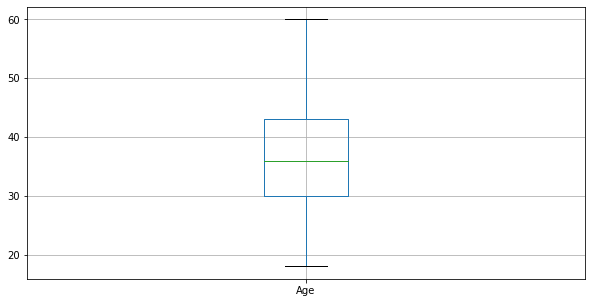

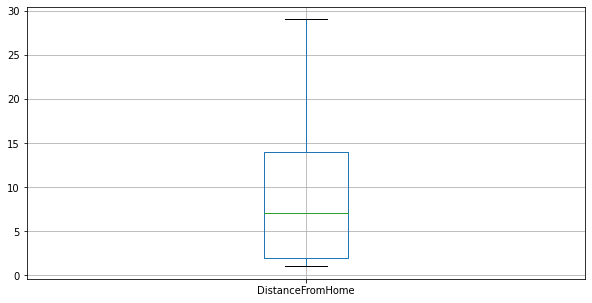

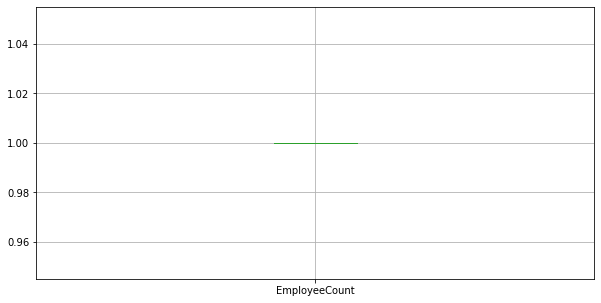

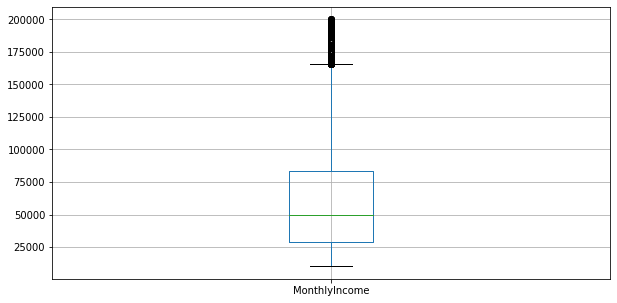

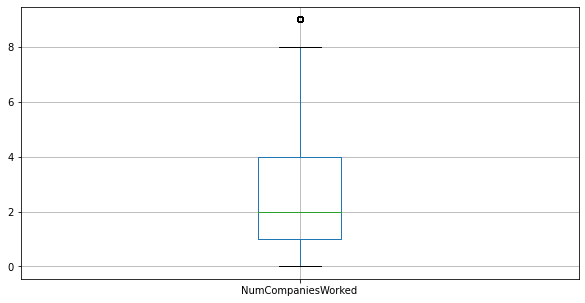

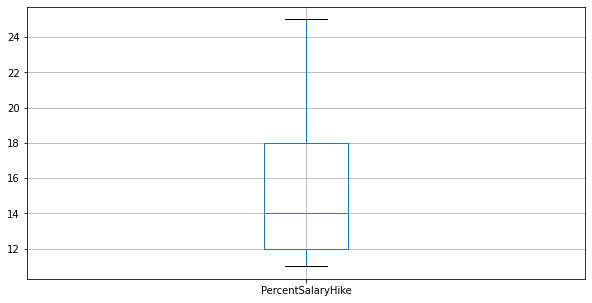

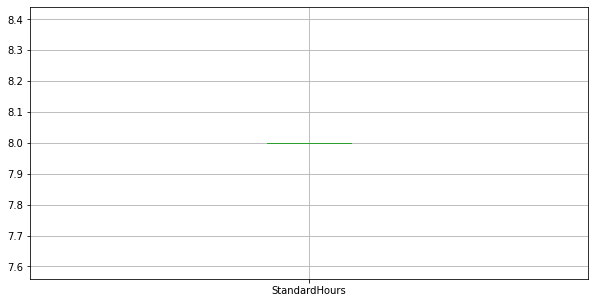

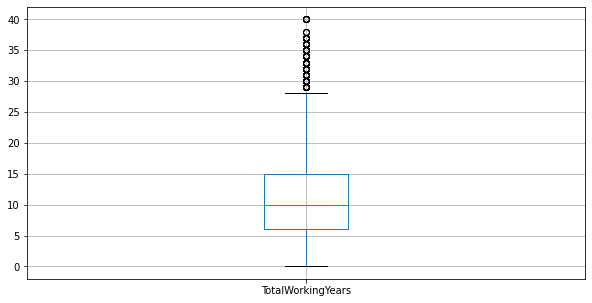

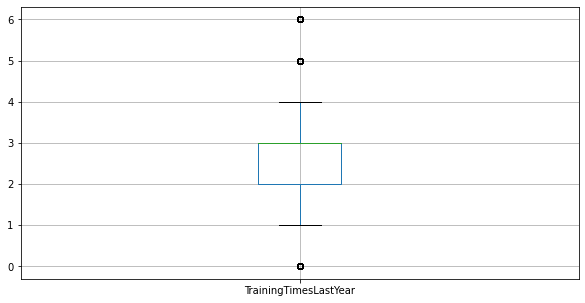

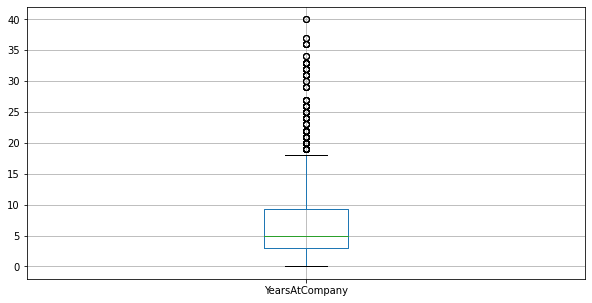

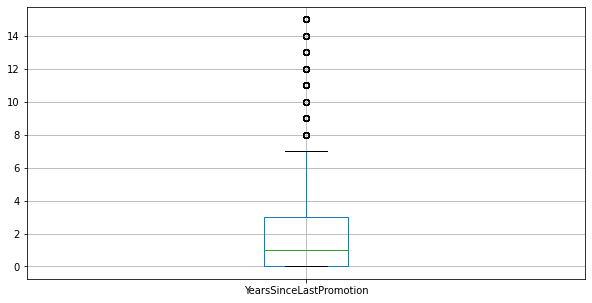

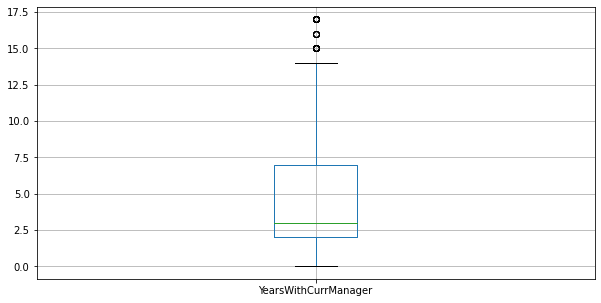

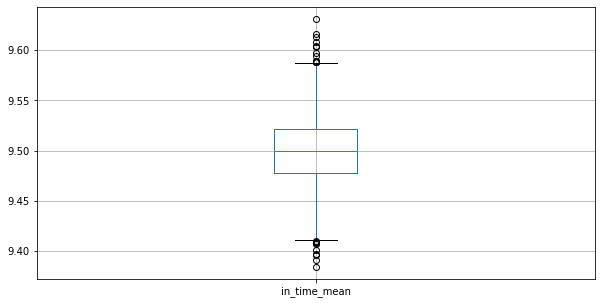

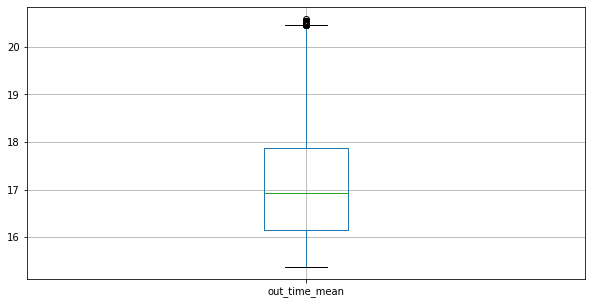

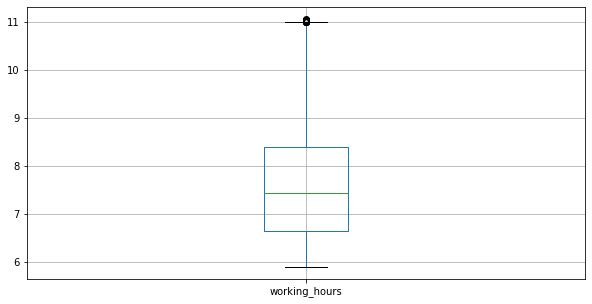

In [20]:
# Plotting boxplots for all continous variables in order to detect outliers.

for column in numeric_cols:
    plt.figure(figsize = (10,5))
    numeric_cols.boxplot([column])
    
# Some variables have outliers. These outliers will be treated in the next step.

In [21]:
# Flooring and capping ouliers.

for col in numeric_cols.columns:
    Q1 = numeric_cols[col].quantile(0.25)
    Q3 = numeric_cols[col].quantile(0.75)
    IQR = Q3 - Q1 
    Lower_cap  = Q1 - 1.5*IQR
    Upper_cap = Q3 + 1.5*IQR
    numeric_cols[col][numeric_cols[col] <= Lower_cap] = Lower_cap
    numeric_cols[col][numeric_cols[col] >= Upper_cap] = Upper_cap

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/opt/conda/lib/python3.7/site-packages/pandas/core/series.py:992: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._where(~key, value, inplace=True)
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we 

In [22]:
# Dropping numeric columns from final_data.

final_data.drop(['Age', 'DistanceFromHome', 'EmployeeCount', 'MonthlyIncome',
       'NumCompaniesWorked', 'PercentSalaryHike', 'StandardHours',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'in_time_mean',
       'out_time_mean', 'working_hours'], axis = 1, inplace = True)

In [23]:
# Setting the index of "numeric_cols" and "final_data" before joining them.

numeric_cols.reset_index(drop = True, inplace = True)

final_data.reset_index(drop = True, inplace = True)

In [24]:
# Joining "numeric_cols" and "final_data" after outlier treatment.

final_data = pd.concat([final_data, numeric_cols], axis = 1)

### **Exploratory data analysis**

### **Effect of categorical variables on employee atrrition**

Text(0.5, 1.0, 'Effect of Environment satistfaction on Attrition')

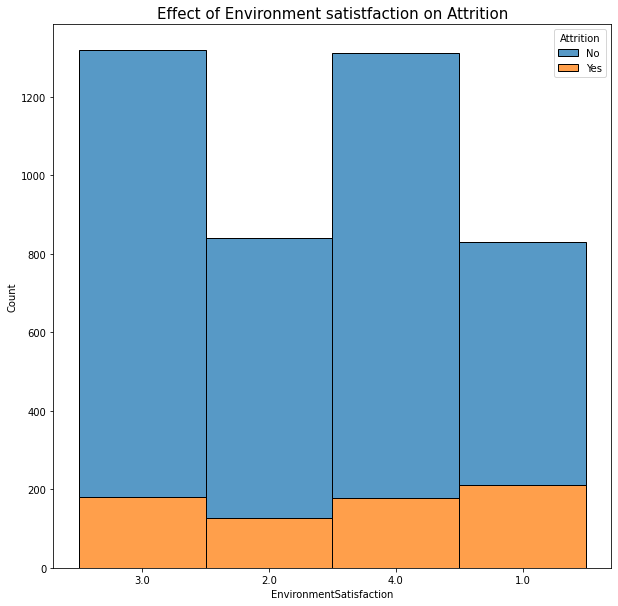

In [25]:
# Effect of Environment satistfaction on Attrition.

plt.figure(figsize = (10,10))

sns.histplot(binwidth = 0.5, x = "EnvironmentSatisfaction", hue = "Attrition", data = final_data, stat = "count", multiple = "stack")

plt.title("Effect of Environment satistfaction on Attrition", size = 15)

# When EnvironmentSatisfaction = 1 (Low), atrrition is more.

Text(0.5, 1.0, 'Effect of Job satistfaction on Attrition')

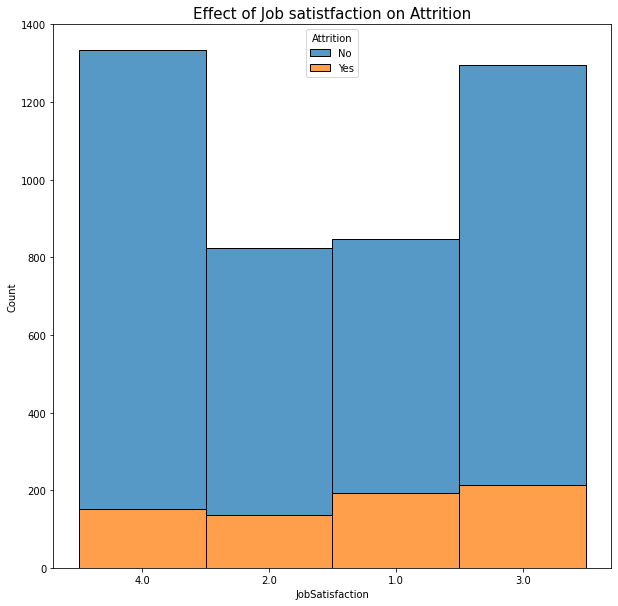

In [26]:
# Effect of Job satistfaction on Attrition.

plt.figure(figsize = (10,10))

sns.histplot(binwidth = 0.5, x = "JobSatisfaction", hue = "Attrition", data = final_data, stat = "count", multiple = "stack")

plt.title("Effect of Job satistfaction on Attrition", size = 15)

# When JobSatisfaction level is low, atrrition is high.

Text(0.5, 1.0, 'Effect of WorkLifeBalance on Attrition')

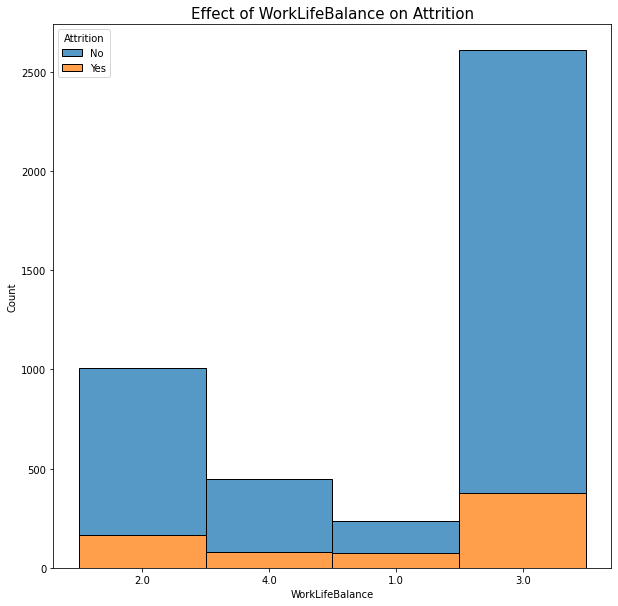

In [27]:
# Effect of WorkLifeBalance on Attrition.

plt.figure(figsize = (10,10))

sns.histplot(binwidth = 0.5, x = "WorkLifeBalance", hue = "Attrition", data = final_data, stat = "count", multiple = "stack")

plt.title("Effect of WorkLifeBalance on Attrition", size = 15)

# When WorkLifeBalance = 2 and WorkLifeBalance = 3, atrrition is more.

Text(0.5, 1.0, 'Effect of Education on Attrition')

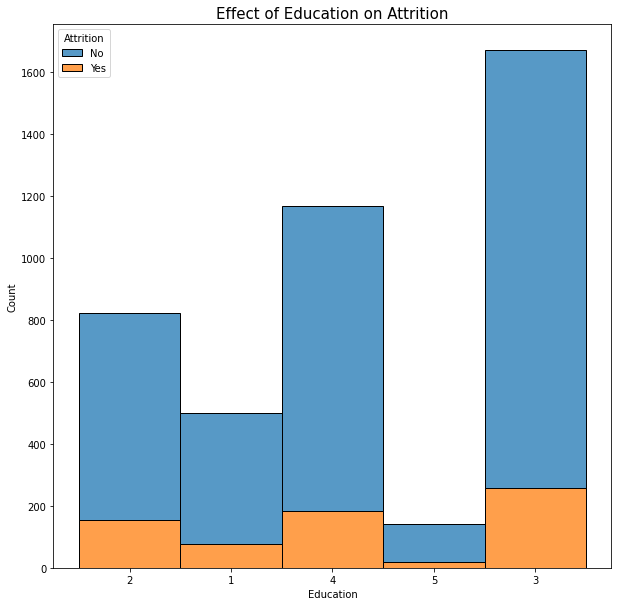

In [28]:
# Effect of Education on Attrition.

plt.figure(figsize = (10,10))

sns.histplot(binwidth = 0.5, x = "Education", hue = "Attrition", data = final_data, stat = "count", multiple = "stack")

plt.title("Effect of Education on Attrition", size = 15)

# Attrition is high in highly educated employees (Education level 1 to 4).

Text(0.5, 1.0, 'Effect of Department on Attrition')

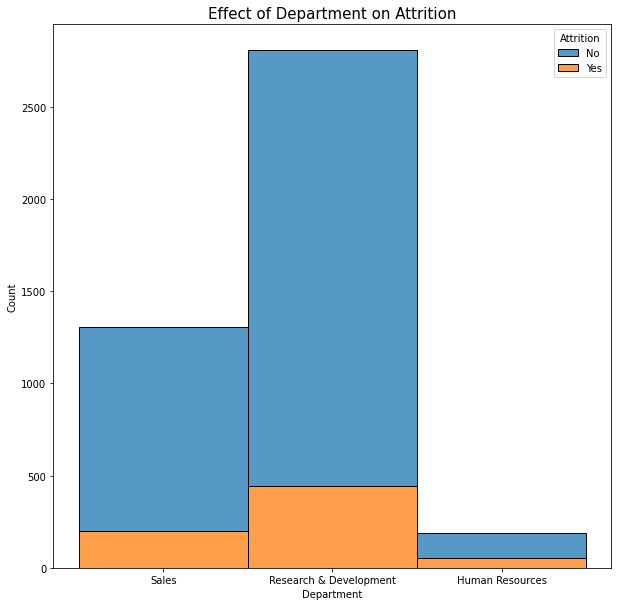

In [29]:
# Effect of Department on Attrition.

plt.figure(figsize = (10,10))

sns.histplot(binwidth = 0.5, x = "Department", hue = "Attrition", data = final_data, stat = "count", multiple = "stack")

plt.title("Effect of Department on Attrition", size = 15)

# Attrition is high in "Research and Development" department.

Text(0.5, 1.0, 'Effect of BusinessTravel on Attrition')

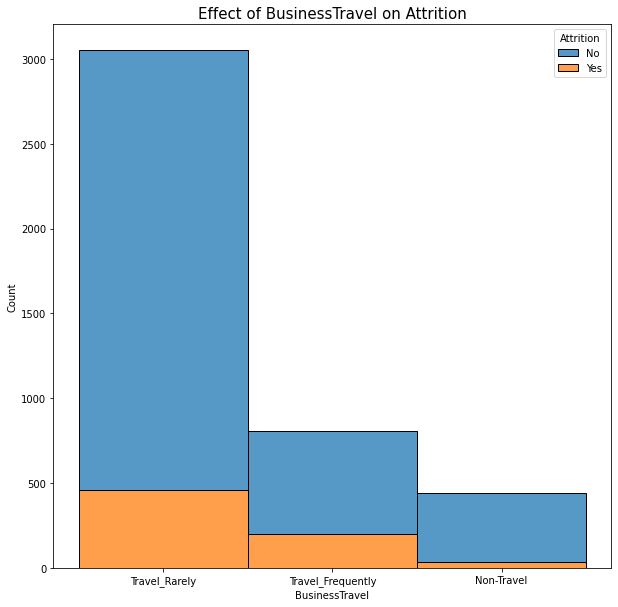

In [30]:
# Effect of BusinessTravel on Attrition.

plt.figure(figsize = (10,10))

sns.histplot(binwidth = 0.5, x = "BusinessTravel", hue = "Attrition", data = final_data, stat = "count", multiple = "stack")

plt.title("Effect of BusinessTravel on Attrition", size = 15)

# When there is no travel component in the job, atrrition is less.

Text(0.5, 1.0, 'Effect of EducationField on Attrition')

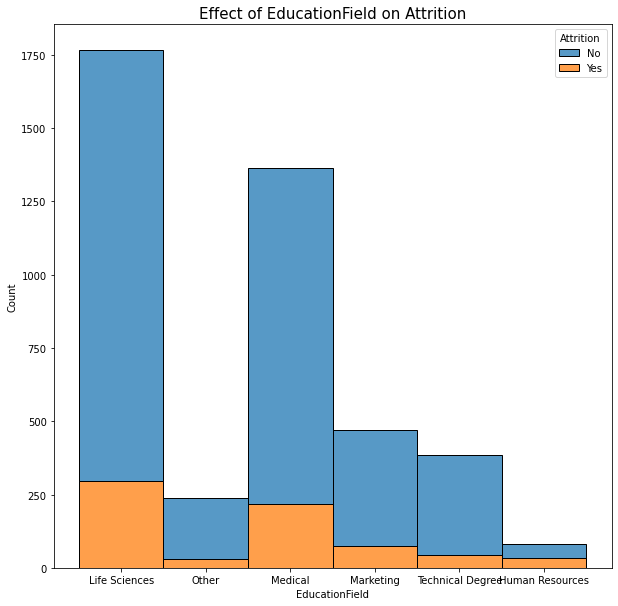

In [31]:
# Effect of EducationField on Attrition.

plt.figure(figsize = (10,10))

sns.histplot(binwidth = 0.5, x = "EducationField", hue = "Attrition", data = final_data, stat = "count", multiple = "stack")

plt.title("Effect of EducationField on Attrition", size = 15)

# Attrition is high in education fields like Life sciences and Medical.

Text(0.5, 1.0, 'Effect of Gender on Attrition')

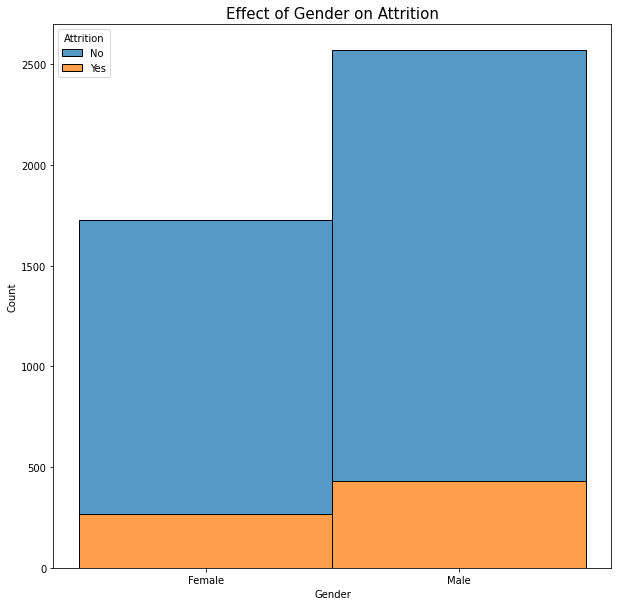

In [32]:
# Effect of Gender on Attrition.

plt.figure(figsize = (10,10))

sns.histplot(binwidth = 0.5, x = "Gender", hue = "Attrition", data = final_data, stat = "count", multiple = "stack")

plt.title("Effect of Gender on Attrition", size = 15)

# High level of attrition is seen in male employees.

Text(0.5, 1.0, 'Effect of JobRole on Attrition')

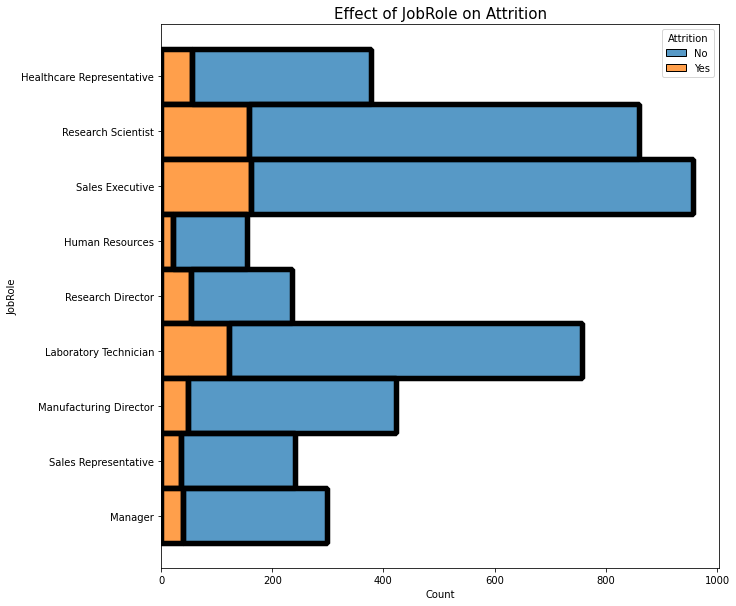

In [33]:
# Effect of JobRole on Attrition.

plt.figure(figsize = (10,10))

sns.histplot(binwidth = 0.5, y = "JobRole", hue = "Attrition", data = final_data, stat = "count", multiple = "stack")

plt.title("Effect of JobRole on Attrition", size = 15)

# Research scientists and Sales executives are more prone to atrrition.

Text(0.5, 1.0, 'Effect of MaritalStatus on Attrition')

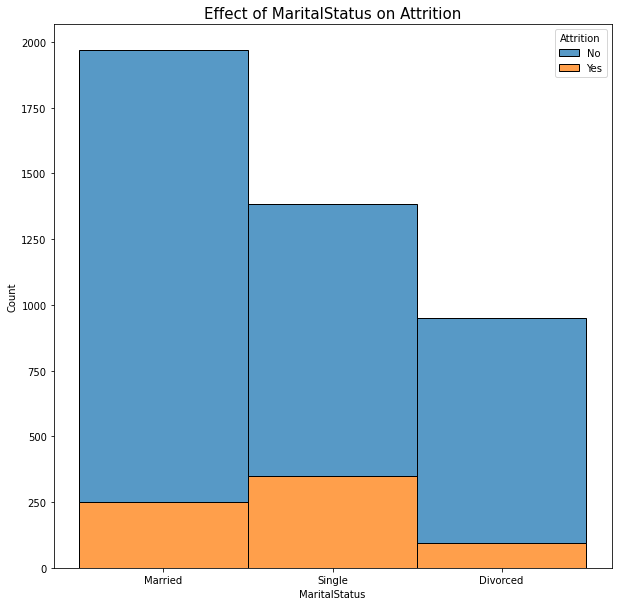

In [34]:
# Effect of MaritalStatus on Attrition.

plt.figure(figsize = (10,10))

sns.histplot(binwidth = 0.5, x = "MaritalStatus", hue = "Attrition", data = final_data, stat = "count", multiple = "stack")

plt.title("Effect of MaritalStatus on Attrition", size = 15)

# Employees with marital status as single are more prone to attrition.

Text(0.5, 1.0, 'Effect of JobLevel on Attrition')

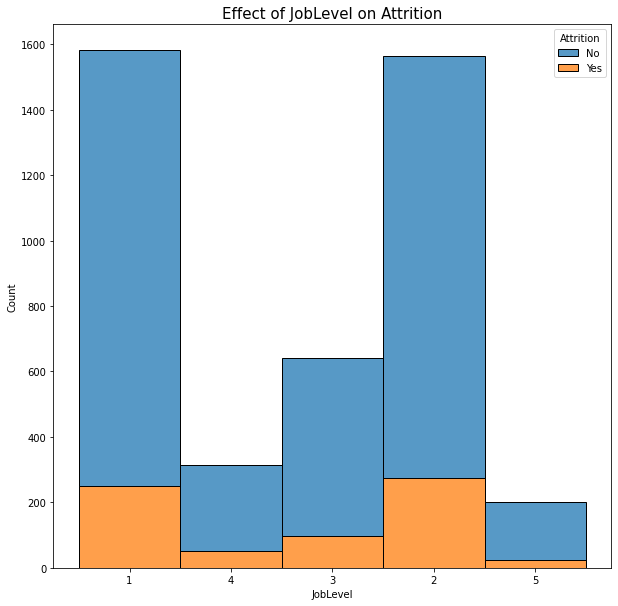

In [35]:
# Effect of JobLevel on Attrition.

plt.figure(figsize = (10,10))

sns.histplot(binwidth = 0.5, x = "JobLevel", hue = "Attrition", data = final_data, stat = "count", multiple = "stack")

plt.title("Effect of JobLevel on Attrition", size = 15)

# Higher attrition is seen in employees with job level 1 and 2.

Text(0.5, 1.0, 'Effect of PerformanceRating on Attrition')

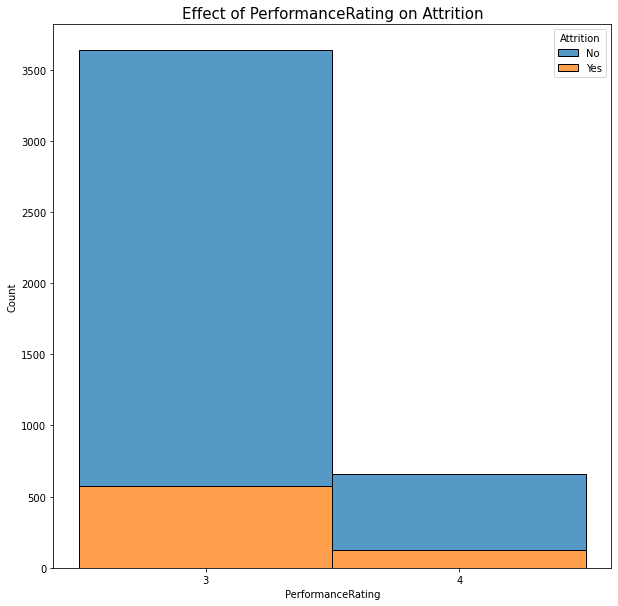

In [36]:
# Effect of PerformanceRating on Attrition.

plt.figure(figsize = (10,10))

sns.histplot(binwidth = 0.5, x = "PerformanceRating", hue = "Attrition", data = final_data, stat = "count", multiple = "stack")

plt.title("Effect of PerformanceRating on Attrition", size = 15)

# Employees with less performance rating are likely to undergo attrition.

### **Effect of continuous variables on employee attrition**

<Figure size 720x720 with 0 Axes>

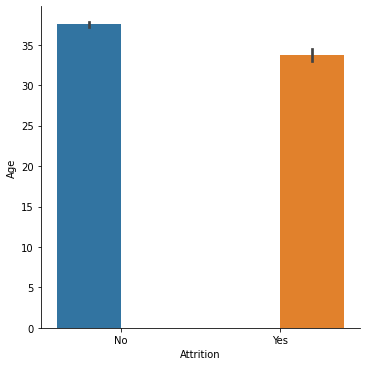

In [37]:
# Effect of Age on attrition.

plt.figure(figsize = (10,10))

sns.catplot(x = "Attrition", y = "Age", hue = "Attrition", kind = "bar", data = final_data)

# Younger employees are more prone to attrition.

<Figure size 720x720 with 0 Axes>

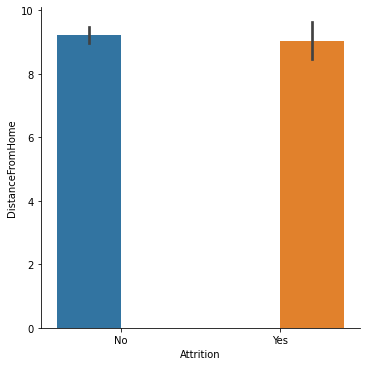

In [38]:
# Effect of DistanceFromHome on attrition.

plt.figure(figsize = (10,10))

sns.catplot(x = "Attrition", y = "DistanceFromHome", hue = "Attrition", kind = "bar", data = final_data)

# No significant difference is seen in DistanceFromHome in terms of attrition.

<Figure size 720x720 with 0 Axes>

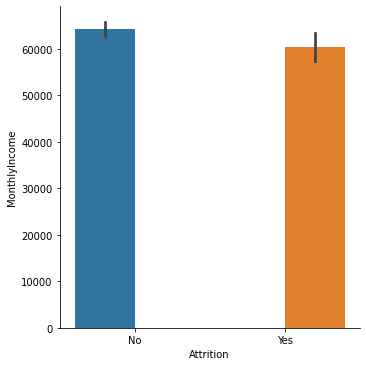

In [39]:
# Effect of MonthlyIncome on attrition.

plt.figure(figsize = (10,10))

sns.catplot(x = "Attrition", y = "MonthlyIncome", hue = "Attrition", kind = "bar", data = final_data)

# As monthly income decreases, attrition increases.

<Figure size 720x720 with 0 Axes>

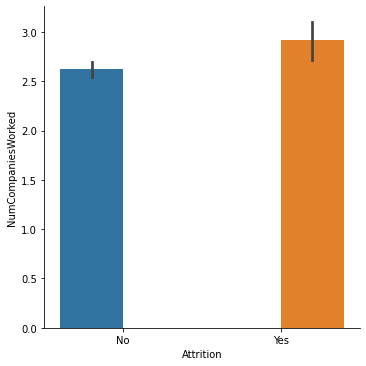

In [40]:
# Effect of NumCompaniesWorked on attrition.

plt.figure(figsize = (10,10))

sns.catplot(x = "Attrition", y = "NumCompaniesWorked", hue = "Attrition", kind = "bar", data = final_data)

# As NumCompaniesWorked increases, attrition increases.

<Figure size 720x720 with 0 Axes>

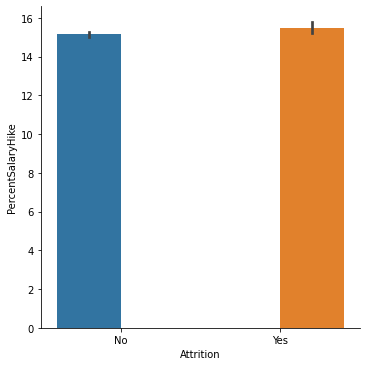

In [41]:
# Effect of PercentSalaryHike on attrition.

plt.figure(figsize = (10,10))

sns.catplot(x = "Attrition", y = "PercentSalaryHike", hue = "Attrition", kind = "bar", data = final_data)

# Attrition increases with PercentSalaryHike.

<Figure size 720x720 with 0 Axes>

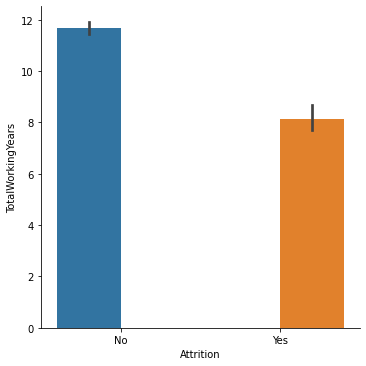

In [42]:
# Effect of TotalWorkingYears on attrition.

plt.figure(figsize = (10,10))

sns.catplot(x = "Attrition", y = "TotalWorkingYears", hue = "Attrition", kind = "bar", data = final_data)

# Attrition is seen in employees with less TotalWorkingYears.

<Figure size 720x720 with 0 Axes>

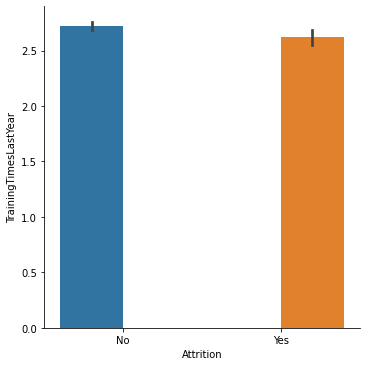

In [43]:
# Effect of TrainingTimesLastYear on attrition.

plt.figure(figsize = (10,10))

sns.catplot(x = "Attrition", y = "TrainingTimesLastYear", hue = "Attrition", kind = "bar", data = final_data)

# Attrition is more when TrainingTimesLastYear is less.

<Figure size 720x720 with 0 Axes>

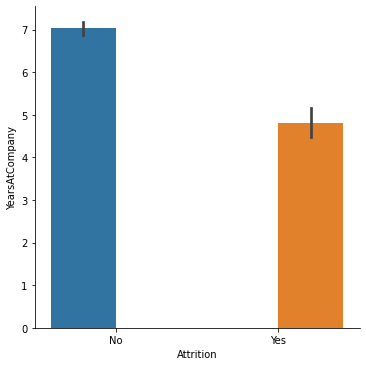

In [44]:
# Effect of YearsAtCompany on attrition.

plt.figure(figsize = (10,10))

sns.catplot(x = "Attrition", y = "YearsAtCompany", hue = "Attrition", kind = "bar", data = final_data)

# When YearsAtCompany is less, attrition is more.

<Figure size 720x720 with 0 Axes>

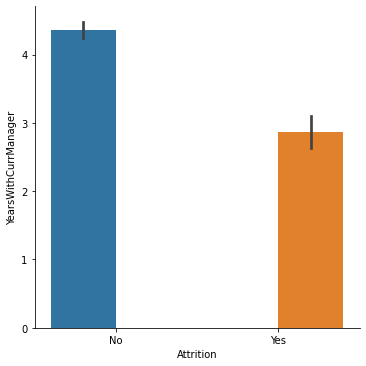

In [45]:
# Effect of YearsWithCurrManager on attrition.

plt.figure(figsize = (10,10))

sns.catplot(x = "Attrition", y = "YearsWithCurrManager", hue = "Attrition", kind = "bar", data = final_data)

# When YearsWithCurrManager is less, attrition is more.

<Figure size 720x720 with 0 Axes>

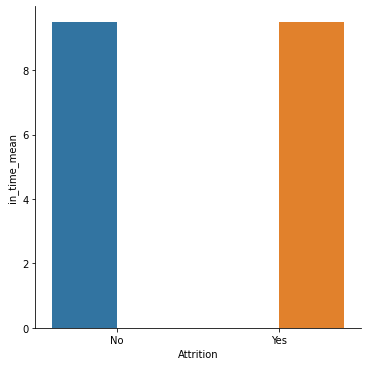

In [46]:
# Effect of in_time_mean on attrition.

plt.figure(figsize = (10,10))

sns.catplot(x = "Attrition", y = "in_time_mean", hue = "Attrition", kind = "bar", data = final_data)

# When in_time_mean increases, attrition increases.

<Figure size 720x720 with 0 Axes>

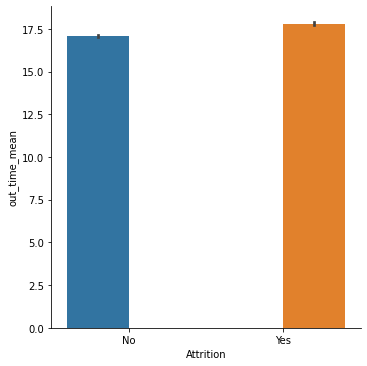

In [47]:
# Effect of out_time_mean on attrition.

plt.figure(figsize = (10,10))

sns.catplot(x = "Attrition", y = "out_time_mean", hue = "Attrition", kind = "bar", data = final_data)

# When out_time_mean increases, attrition increases.

<Figure size 720x720 with 0 Axes>

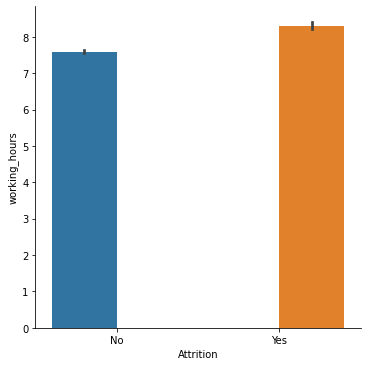

In [48]:
# Effect of working_hours on attrition.

plt.figure(figsize = (10,10))

sns.catplot(x = "Attrition", y = "working_hours", hue = "Attrition", kind = "bar", data = final_data)

# When working_hours increases, attrition increases.

### **Insights:**

Attrition increases when,
1. EnvironmentSatisfaction level of employee is low.
2. JobSatisfaction level of employee is low.
3. WorkLifeBalance of employee is low (i.e. level 2 and 3).
4. Level  of education of employee increases.
5. Department of employee is Research and Development.
6. Employees have to travel as a part of their job.
7. EducationField of employee is Life sciences and Medical.
8. Gender of employee is male.
9. JobRole of employee is Research scientist and Sales ececutive.
10. Marital status of employee is single.
11. JobLevel of employee is 1 and 2 (i.e. low).
12. Performance rating of employee is less.
13. Age of employee is less.
14. Monhly income of employee is less.
15. NumCompaniesWorled by employee is more.
16. PercentSalaryHike of employee is more.
17. TotalWorkingYears of employee is less.
18. TrainingTimesLastYear is less.
19. YearsAtCompany is less.
20. YearsWithCurrManager is less.
21. working hours are more.

### **Model building:**

In [49]:
# Extracting only cartegorical column from final_data.

cat_cols = final_data.select_dtypes(include = 'object')

In [50]:
# Getting column names from df cat_cols.

cat_cols.columns

Index(['EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance',
       'Attrition', 'BusinessTravel', 'Department', 'Education',
       'EducationField', 'Gender', 'JobLevel', 'JobRole', 'MaritalStatus',
       'Over18', 'StockOptionLevel', 'JobInvolvement', 'PerformanceRating'],
      dtype='object')

In [51]:
# Creating dummy varibles for categorical variables.

dummy = pd.get_dummies(final_data, columns = ['EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance', 'BusinessTravel', 'Department', 'Education','EducationField', 'Gender', 'JobLevel', 'JobRole', 'MaritalStatus','Over18', 'StockOptionLevel', 'JobInvolvement', 'PerformanceRating'], drop_first = True)

final_data = pd.concat([final_data, dummy], axis = 1)

final_data.drop(['EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance', 'BusinessTravel', 'Department', 'Education','EducationField', 'Gender', 'JobLevel', 'JobRole', 'MaritalStatus','Over18', 'StockOptionLevel', 'JobInvolvement', 'PerformanceRating'], axis = 1, inplace = True)

In [52]:
# View final_data after dummy variable creation.

final_data

,EmployeeID,Attrition,Age,DistanceFromHome,EmployeeCount,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,TotalWorkingYears,...,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,StockOptionLevel_1,StockOptionLevel_2,StockOptionLevel_3,JobInvolvement_2,JobInvolvement_3,JobInvolvement_4,PerformanceRating_4
0,1,No,51,6,1,131160.00,1.0,11,8,1.0,...,0,1,0,0,0,0,0,1,0,0
1,2,Yes,31,10,1,41890.00,0.0,23,8,6.0,...,0,0,1,1,0,0,1,0,0,1
2,3,No,32,17,1,165616.25,1.0,15,8,5.0,...,0,1,0,0,0,1,0,1,0,0
3,4,No,38,2,1,83210.00,3.0,11,8,13.0,...,0,1,0,0,0,1,1,0,0,0
4,5,No,32,10,1,23420.00,4.0,12,8,9.0,...,0,0,1,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4295,4405,No,29,4,1,35390.00,1.0,18,8,6.0,...,0,0,1,0,0,0,1,0,0,0
4296,4406,No,42,5,1,60290.00,3.0,17,8,10.0,...,0,0,1,1,0,0,0,1,0,0
4297,4407,No,29,2,1,26790.00,2.0,15,8,10.0,...,0,0,0,0,0,0,1,0,0,0
4298,4408,No,25,25,1,37020.00,0.0,20,8,5.0,...,0,1,0,0,0,0,0,1,0,1


In [53]:
# Storing EmployeeID and Attrition in different dataframes and dropping them from final_data.

Emp_ID = final_data["EmployeeID"]

final_data.drop(["EmployeeID"], axis = 1, inplace = True)

Attr = final_data["Attrition"]

final_data.drop(["Attrition"], axis = 1, inplace = True)

In [54]:
# Scaling the numeric columns before building the model.

scaler = StandardScaler()

scaled_df = pd.DataFrame(scaler.fit_transform(final_data),columns = final_data.columns)

In [55]:
# Setting index before joining dataframes "Attr" and "scaled_df".

Attr.reset_index(drop = True, inplace = True)

scaled_df.reset_index(drop = True, inplace = True)

In [56]:
# joining dataframes "Attr" and "scaled_df".

scaled_df = pd.concat([scaled_df, Attr], axis = 1)

In [57]:
# Removing duplicate columns from scaled_df dataset.

scaled_df = scaled_df.loc[:,~scaled_df.columns.duplicated()]

In [58]:
# Converting Attrition to 1's and 0's based on whether value is "Yes" and "No" respectively.

scaled_df['Attrition'] = scaled_df['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)

In [59]:
# Examine valriable "Attrition".

scaled_df['Attrition'].value_counts()

0    3605
1     695
Name: Attrition, dtype: int64

### **Splitting the given data into train and test data.**

In [60]:
# Storing "Attrition" in "y" and other variables in "X".

y = scaled_df['Attrition']

X = scaled_df.drop(['Attrition'], axis = 1)

In [61]:
# Splitting X anf y into train and test data.

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [62]:
# Using Recursive feature elemination for feature selection.

logReg = LogisticRegression()

rfe = RFE(logReg, 15)  

rfe = rfe.fit(X_train, y_train)

print(rfe.support_) 

print(rfe.ranking_) 

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_features_to_select=15 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[ True False False False  True False False  True False False  True  True
 False False  True  True  True  True False False  True False False False
  True  True  True  True False False False False False False False False
 False False False False False False False False False False False False
 False False False  True False False False False False False False]
[ 1 34 45 23  1 38 44  1  9 16  1  1 26  5  1  1  1  1  7  6  1  3  2  4
  1  1  1  1 37 40 30 15 36 21 20 18 35 29 28 22 43 19 42 12 32 33 10 13
 11 17 14  1 27 39 41 24  8 25 31]


In [63]:
# Getting names of top 15 variables that have to be used for model building.

feature_names = np.array(X_train.columns)

top_cols = feature_names[rfe.support_]

top_cols

array(['Age', 'NumCompaniesWorked', 'TotalWorkingYears',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'working_hours',
       'EnvironmentSatisfaction_2.0', 'EnvironmentSatisfaction_3.0',
       'EnvironmentSatisfaction_4.0', 'JobSatisfaction_4.0',
       'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely',
       'Department_Research & Development', 'Department_Sales',
       'MaritalStatus_Single'], dtype=object)

In [64]:
# Creating new dataframe as "new_train" with top 15 features.

new_train = X_train[top_cols]

new_train

,Age,NumCompaniesWorked,TotalWorkingYears,YearsSinceLastPromotion,YearsWithCurrManager,working_hours,EnvironmentSatisfaction_2.0,EnvironmentSatisfaction_3.0,EnvironmentSatisfaction_4.0,JobSatisfaction_4.0,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,MaritalStatus_Single
2972,-1.085455,-0.682059,-0.835615,-0.775806,-0.033280,-1.074907,-0.492357,-0.665183,1.509119,-0.670644,-0.481393,0.639823,-1.371170,1.513267,-0.688195
1223,1.210768,2.377246,1.627317,-0.775806,-1.171274,1.204974,-0.492357,-0.665183,-0.662638,-0.670644,-0.481393,0.639823,0.729304,-0.660822,1.453077
1625,-1.194799,-0.682059,-1.382933,-0.775806,-1.171274,0.750270,-0.492357,1.503345,-0.662638,1.491103,-0.481393,0.639823,-1.371170,1.513267,1.453077
2339,-0.429391,-0.682059,-0.561956,-0.372083,-0.602277,1.304651,-0.492357,1.503345,-0.662638,1.491103,-0.481393,-1.562931,0.729304,-0.660822,-0.688195
4295,-0.866767,-0.682059,-0.698785,-0.372083,0.251219,-0.302881,-0.492357,1.503345,-0.662638,1.491103,-0.481393,0.639823,-1.371170,1.513267,1.453077
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4149,-1.850862,-0.682059,-1.382933,-0.372083,-1.171274,2.238525,-0.492357,-0.665183,1.509119,1.491103,2.077307,-1.562931,-1.371170,1.513267,1.453077
1890,1.210768,1.765385,2.174635,0.839087,1.104714,-0.899743,-0.492357,1.503345,-0.662638,-0.670644,-0.481393,0.639823,-1.371170,1.513267,1.453077
350,-0.757423,2.377246,-0.151467,-0.775806,-0.317778,-0.945120,2.031046,-0.665183,-0.662638,1.491103,2.077307,-1.562931,0.729304,-0.660822,-0.688195
79,0.007985,1.765385,-0.425126,-0.775806,-0.033280,-1.231335,-0.492357,-0.665183,1.509119,1.491103,-0.481393,0.639823,-1.371170,1.513267,-0.688195


In [65]:
# Creating new dataframe as "new_test" with top 15 features.

new_test = X_test[top_cols]

new_test

,Age,NumCompaniesWorked,TotalWorkingYears,YearsSinceLastPromotion,YearsWithCurrManager,working_hours,EnvironmentSatisfaction_2.0,EnvironmentSatisfaction_3.0,EnvironmentSatisfaction_4.0,JobSatisfaction_4.0,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,MaritalStatus_Single
107,-1.741519,-0.682059,-1.382933,-0.775806,-1.171274,-1.275723,-0.492357,1.503345,-0.662638,-0.670644,-0.481393,0.639823,-1.371170,-0.660822,1.453077
403,1.320112,0.541663,2.379880,-0.372083,0.820216,-0.539829,-0.492357,-0.665183,-0.662638,-0.670644,-0.481393,0.639823,0.729304,-0.660822,-0.688195
723,1.320112,0.133756,1.216828,-0.372083,-0.317778,-0.454853,-0.492357,-0.665183,-0.662638,-0.670644,2.077307,-1.562931,-1.371170,1.513267,1.453077
3787,1.210768,-0.274152,1.079999,2.050257,0.820216,1.669364,-0.492357,-0.665183,1.509119,-0.670644,2.077307,-1.562931,-1.371170,1.513267,-0.688195
1565,-0.757423,-1.089966,-0.698785,0.839087,-0.033280,-0.133120,2.031046,-0.665183,-0.662638,-0.670644,-0.481393,0.639823,-1.371170,1.513267,1.453077
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2680,0.882736,0.541663,0.806340,-0.775806,-1.171274,0.924872,-0.492357,-0.665183,1.509119,-0.670644,-0.481393,0.639823,-1.371170,-0.660822,-0.688195
209,1.429456,-0.682059,2.379880,2.252118,0.820216,-0.700967,-0.492357,-0.665183,-0.662638,-0.670644,2.077307,-1.562931,-1.371170,1.513267,-0.688195
3865,-0.976111,-0.682059,-0.835615,-0.775806,-0.317778,-0.236571,-0.492357,1.503345,-0.662638,1.491103,-0.481393,0.639823,-1.371170,1.513267,-0.688195
147,0.554704,-1.089966,-0.561956,-0.775806,-0.033280,-0.849518,-0.492357,-0.665183,1.509119,1.491103,2.077307,-1.562931,0.729304,-0.660822,-0.688195


In [66]:
# Function to calculate Variance Inflation factor (VIF).

def Cal_VIF(X_train):
    
    vif = pd.DataFrame()
    
    X = X_train
    
    vif['Features'] = X.columns
    
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    
    vif['VIF'] = round(vif['VIF'], 2)
    
    vif = vif.sort_values(by = "VIF", ascending = False)
    
    return(vif)

In [67]:
# Building logistic regression model_1.

model_1 = sm.GLM(y_train, (sm.add_constant(new_train)), family = sm.families.Binomial()).fit()

print(model_1.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Attrition   No. Observations:                 3010
Model:                            GLM   Df Residuals:                     2994
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1074.9
Date:                Tue, 24 Aug 2021   Deviance:                       2149.8
Time:                        06:55:40   Pearson chi2:                 4.83e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

In [68]:
# Calculating VIF.

VIF = Cal_VIF(new_train)

VIF

,Features,VIF
12,Department_Research & Development,5.62
13,Department_Sales,5.60
2,TotalWorkingYears,2.46
10,BusinessTravel_Travel_Frequently,2.40
11,BusinessTravel_Travel_Rarely,2.40
0,Age,1.97
7,EnvironmentSatisfaction_3.0,1.79
8,EnvironmentSatisfaction_4.0,1.79
4,YearsWithCurrManager,1.67
6,EnvironmentSatisfaction_2.0,1.62


In [69]:
# Removing "Department_Research & Development".

new_train = new_train.drop("Department_Research & Development", axis = 1)

In [70]:
# Building model_2.

model_2 = sm.GLM(y_train, (sm.add_constant(new_train)), family = sm.families.Binomial()).fit()

print(model_2.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Attrition   No. Observations:                 3010
Model:                            GLM   Df Residuals:                     2995
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1081.2
Date:                Tue, 24 Aug 2021   Deviance:                       2162.5
Time:                        06:55:51   Pearson chi2:                 4.74e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

In [71]:
# Calculating VIF.

VIF = Cal_VIF(new_train)

VIF

,Features,VIF
2,TotalWorkingYears,2.45
10,BusinessTravel_Travel_Frequently,2.40
11,BusinessTravel_Travel_Rarely,2.40
0,Age,1.96
7,EnvironmentSatisfaction_3.0,1.79
8,EnvironmentSatisfaction_4.0,1.79
4,YearsWithCurrManager,1.67
6,EnvironmentSatisfaction_2.0,1.62
3,YearsSinceLastPromotion,1.40
1,NumCompaniesWorked,1.19


In [72]:
# Removing "TotalWorkingYears" as it is highly insignificant and has higher VIF.

new_train = new_train.drop(["TotalWorkingYears"], axis = 1)

In [73]:
# Building model_3.

model_3 = sm.GLM(y_train, (sm.add_constant(new_train)), family = sm.families.Binomial()).fit()

print(model_3.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Attrition   No. Observations:                 3010
Model:                            GLM   Df Residuals:                     2996
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1095.4
Date:                Tue, 24 Aug 2021   Deviance:                       2190.7
Time:                        06:56:04   Pearson chi2:                 3.92e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

In [74]:
# Calculating VIF.

VIF = Cal_VIF(new_train)

VIF

,Features,VIF
9,BusinessTravel_Travel_Frequently,2.40
10,BusinessTravel_Travel_Rarely,2.39
6,EnvironmentSatisfaction_3.0,1.79
7,EnvironmentSatisfaction_4.0,1.79
5,EnvironmentSatisfaction_2.0,1.61
3,YearsWithCurrManager,1.42
2,YearsSinceLastPromotion,1.38
0,Age,1.21
1,NumCompaniesWorked,1.15
12,MaritalStatus_Single,1.02


In [75]:
# Removing "BusinessTravel_Travel_Frequently".

new_train = new_train.drop(["BusinessTravel_Travel_Frequently"], axis = 1)

In [76]:
# Building model_4.

model_4 = sm.GLM(y_train, (sm.add_constant(new_train)), family = sm.families.Binomial()).fit()

print(model_4.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Attrition   No. Observations:                 3010
Model:                            GLM   Df Residuals:                     2997
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1119.7
Date:                Tue, 24 Aug 2021   Deviance:                       2239.4
Time:                        06:56:18   Pearson chi2:                 3.90e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [77]:
# Calculating VIF.

VIF = Cal_VIF(new_train)

VIF

# All VIF values are below 2. In further steps, variables will be eliminated based on p-values.

,Features,VIF
6,EnvironmentSatisfaction_3.0,1.79
7,EnvironmentSatisfaction_4.0,1.79
5,EnvironmentSatisfaction_2.0,1.61
3,YearsWithCurrManager,1.42
2,YearsSinceLastPromotion,1.38
0,Age,1.21
1,NumCompaniesWorked,1.15
11,MaritalStatus_Single,1.02
4,working_hours,1.01
8,JobSatisfaction_4.0,1.01


In [78]:
# Removing "Department_Sales".

new_train = new_train.drop(["Department_Sales"], axis = 1)

In [79]:
# Building model_5.

model_5 = sm.GLM(y_train, (sm.add_constant(new_train)), family = sm.families.Binomial()).fit()

print(model_5.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Attrition   No. Observations:                 3010
Model:                            GLM   Df Residuals:                     2998
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1119.9
Date:                Tue, 24 Aug 2021   Deviance:                       2239.7
Time:                        06:56:31   Pearson chi2:                 3.90e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [80]:
# Removing "BusinessTravel_Travel_Rarely".

new_train = new_train.drop(["BusinessTravel_Travel_Rarely"], axis = 1)

In [81]:
# Building model_6.

model_6 = sm.GLM(y_train, (sm.add_constant(new_train)), family = sm.families.Binomial()).fit()

print(model_6.summary())

# All variables are significant. Hence model_6 will be used for predicting test data.

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Attrition   No. Observations:                 3010
Model:                            GLM   Df Residuals:                     2999
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1123.0
Date:                Tue, 24 Aug 2021   Deviance:                       2246.0
Time:                        06:56:38   Pearson chi2:                 3.75e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

### **Model evaluation**

In [82]:
# Dropping the varibles in test data that were removed during variable selection from train data.

new_test = new_test.drop(['TotalWorkingYears',
       'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely',
       'Department_Research & Development', 'Department_Sales'], axis = 1)

In [83]:
# Building final logistic regression model for the purpose of predicting the test data.

log_model = LogisticRegression()

log_model.fit(new_train, y_train)

LogisticRegression()

In [84]:
# Using log_model for predicting test data and storing predictions as "y_pred".

y_pred = log_model.predict_proba(new_test)

In [85]:
# Converting y_pred to dataframe.

y_pred_df = pd.DataFrame(y_pred)

In [86]:
# Converting to column dataframe.

y_pred_1 = y_pred_df.iloc[:,[1]]

y_pred_1

,1
0,0.302672
1,0.058276
2,0.234954
3,0.123366
4,0.278489
...,...
1285,0.153582
1286,0.079335
1287,0.058648
1288,0.012489


In [87]:
# Converting y_test to dataframe.

y_test_df = pd.DataFrame(y_test)

y_test_df

,Attrition
107,1
403,0
723,1
3787,1
1565,0
...,...
2680,0
209,0
3865,0
147,0


In [88]:
# Creating "EmployeeID" column.

y_test_df['EmployeeID'] = y_test_df.index

y_test_df

,Attrition,EmployeeID
107,1,107
403,0,403
723,1,723
3787,1,3787
1565,0,1565
...,...,...
2680,0,2680
209,0,209
3865,0,3865
147,0,147


In [89]:
# Setting indices.

y_pred_1.reset_index(drop = True, inplace = True)

y_test_df.reset_index(drop = True, inplace = True)

In [90]:
# Appending y_test_df and y_pred_1.

y_pred_final = pd.concat([y_test_df,y_pred_1],axis=1)

y_pred_final

,Attrition,EmployeeID,1
0,1,107,0.302672
1,0,403,0.058276
2,1,723,0.234954
3,1,3787,0.123366
4,0,1565,0.278489
...,...,...,...
1285,0,2680,0.153582
1286,0,209,0.079335
1287,0,3865,0.058648
1288,0,147,0.012489


In [91]:
# Renaming the column.

y_pred_final = y_pred_final.rename(columns = { 1 : 'Attrition_Prob'})

y_pred_final

,Attrition,EmployeeID,Attrition_Prob
0,1,107,0.302672
1,0,403,0.058276
2,1,723,0.234954
3,1,3787,0.123366
4,0,1565,0.278489
...,...,...,...
1285,0,2680,0.153582
1286,0,209,0.079335
1287,0,3865,0.058648
1288,0,147,0.012489


In [92]:
# Creating new column 'predicted' with 1 if Attrition_Prob > 0.5 else 0.

y_pred_final['predicted'] = y_pred_final.Attrition_Prob.map(lambda x: 1 if x > 0.5 else 0)

y_pred_final

,Attrition,EmployeeID,Attrition_Prob,predicted
0,1,107,0.302672,0
1,0,403,0.058276,0
2,1,723,0.234954,0
3,1,3787,0.123366,0
4,0,1565,0.278489,0
...,...,...,...,...
1285,0,2680,0.153582,0
1286,0,209,0.079335,0
1287,0,3865,0.058648,0
1288,0,147,0.012489,0


In [93]:
# Creating confusion matrix.

confusion = metrics.confusion_matrix(y_pred_final.Attrition, y_pred_final.predicted )

confusion

array([[1068,   25],
       [ 157,   40]])

In [94]:
# Let's check the overall accuracy.

metrics.accuracy_score(y_pred_final.Attrition, y_pred_final.predicted)

0.8589147286821706

In [95]:
# Calculating TP, TN, FP and FN.

TP = confusion[0,0] # true positive 

TN = confusion[1,1] # true negatives

FP = confusion[0,1] # false positives

FN = confusion[1,0] # false negatives

In [96]:
# Let's see the sensitivity of our logistic regression model.

TP / float(TP+FN)

0.8718367346938776

In [97]:
# Let us calculate specificity.

TN / float(TN+FP)

0.6153846153846154

1. Accuracy = 85.89%
2. Sensitivity = 87.18%
3. Specificity = 61.53%

These metrics will be further optimised by calculating optimal decision threshold value.

In [98]:
# Defination to draw ROC curve.

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs, drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 4))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

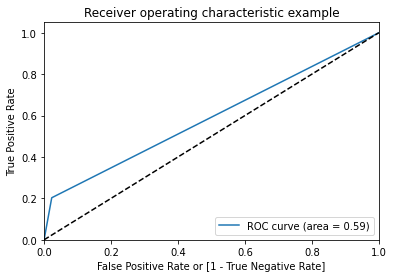

(array([0.        , 0.02287283, 1.        ]),
 array([0.        , 0.20304569, 1.        ]),
 array([2, 1, 0]))

In [99]:
# Drawing ROC curve.

draw_roc(y_pred_final.Attrition, y_pred_final.predicted)

### **Finding optimal threshold value.**

In [100]:
# Let's create columns with different probability cutoffs .

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_pred_final[i]= y_pred_final.Attrition_Prob.map(lambda x: 1 if x > i else 0)
y_pred_final.head()

,Attrition,EmployeeID,Attrition_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,107,0.302672,0,1,1,1,1,0,0,0,0,0,0
1,0,403,0.058276,0,1,0,0,0,0,0,0,0,0,0
2,1,723,0.234954,0,1,1,1,0,0,0,0,0,0,0
3,1,3787,0.123366,0,1,1,0,0,0,0,0,0,0,0
4,0,1565,0.278489,0,1,1,1,0,0,0,0,0,0,0


In [101]:
# Now let's calculate accuracy, sensitivity and specificity for various probability cutoffs.

cutoff_df = pd.DataFrame(columns = ['prob','accuracy','sensitivity','specificity'])
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix( y_pred_final.Attrition, y_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    sensitivity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    specificity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensitivity,specificity]
print(cutoff_df)

     prob  accuracy  sensitivity  specificity
0.0   0.0  0.152713     0.000000     1.000000
0.1   0.1  0.563566     0.513266     0.842640
0.2   0.2  0.760465     0.774016     0.685279
0.3   0.3  0.831783     0.900274     0.451777
0.4   0.4  0.857364     0.958829     0.294416
0.5   0.5  0.858915     0.977127     0.203046
0.6   0.6  0.862016     0.993596     0.131980
0.7   0.7  0.855039     1.000000     0.050761
0.8   0.8  0.849612     1.000000     0.015228
0.9   0.9  0.847287     1.000000     0.000000


<AxesSubplot:xlabel='prob'>

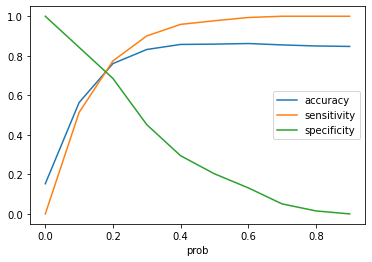

In [102]:
# Let's plot accuracy, sensitivity and specificity for various probabilities.

cutoff_df.plot.line(x = 'prob', y = ['accuracy','sensitivity','specificity'])

# From the plot, optimal threshold = 0.2.

In [103]:
# Using optimal threshold value to predict test data.

y_pred_final['final_predicted'] = y_pred_final.Attrition_Prob.map(lambda x: 1 if x > 0.2 else 0)

y_pred_final

,Attrition,EmployeeID,Attrition_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,107,0.302672,0,1,1,1,1,0,0,0,0,0,0,1
1,0,403,0.058276,0,1,0,0,0,0,0,0,0,0,0,0
2,1,723,0.234954,0,1,1,1,0,0,0,0,0,0,0,1
3,1,3787,0.123366,0,1,1,0,0,0,0,0,0,0,0,0
4,0,1565,0.278489,0,1,1,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1285,0,2680,0.153582,0,1,1,0,0,0,0,0,0,0,0,0
1286,0,209,0.079335,0,1,0,0,0,0,0,0,0,0,0,0
1287,0,3865,0.058648,0,1,0,0,0,0,0,0,0,0,0,0
1288,0,147,0.012489,0,1,0,0,0,0,0,0,0,0,0,0


In [104]:
# Let's check the overall accuracy.

metrics.accuracy_score(y_pred_final.Attrition, y_pred_final.final_predicted)

0.7604651162790698

In [105]:
# Creating confusion matrix.

confusion = metrics.confusion_matrix(y_pred_final.Attrition, y_pred_final.final_predicted)

confusion

array([[846, 247],
       [ 62, 135]])

In [106]:
# Calculating TP, TN, FP and FN.

TP = confusion[0,0] # true positive 

TN = confusion[1,1] # true negatives

FP = confusion[0,1] # false positives

FN = confusion[1,0] # false negatives

In [107]:
# Let's see the sensitivity of our logistic regression model.

TP / float(TP+FN)

0.9317180616740088

In [108]:
# Let us calculate specificity.

TN / float(TN+FP)

0.35340314136125656

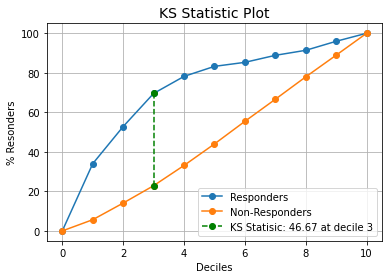

In [109]:
# Plotting KS Statistic Plot.

kds.metrics.plot_ks_statistic(y_pred_final["Attrition"], y_pred_final["Attrition_Prob"])

# KS statistic is 46.67% at 3rd decile indicating the the model is good.

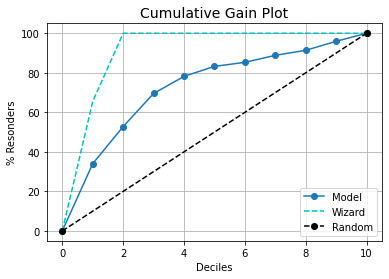

In [110]:
# Plotting Cumulative Gain Plot.

kds.metrics.plot_cumulative_gain(y_pred_final["Attrition"], y_pred_final["Attrition_Prob"])

# By the 4th decile, the model is able to identify 80% of employees who are prone to attrition.

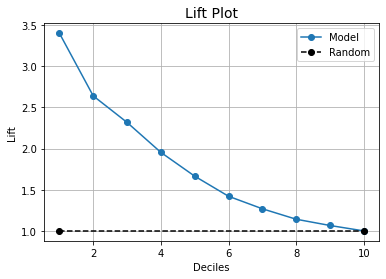

In [111]:
# Plotting Lift Plot.

kds.metrics.plot_lift(y_pred_final["Attrition"], y_pred_final["Attrition_Prob"])

# In the 4th decile, the lift is 2.0 which indicates that we have 2.0 times advantage over a random model.

### **Conclusions:**
1. Accuracy = 76.04%
2. Sensitivity = 93.17%
3. Specificity = 35.34%
4. KS statistic = 46.67 at decile 3.
5. Gain = 80% by 4th decile.
6. Lift = 2.0 at decile 4.

From our logistic regression model, the following factors influence the rate of attrition.
1. Age
2. NumCompaniesWorked
3. YearsSinceLastPromotion
4. YearsWithCurrManager
5. working_hours
6. EnvironmentSatisfaction_2.0
7. EnvironmentSatisfaction_3.0
8. EnvironmentSatisfaction_4.0
9. JobSatisfaction_4.0
10. MaritalStatus_Single

Hence the company must consider above mentioned factors to overcome attrition of their employees.